In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv('confirm_step.csv')

df_1

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time
0,8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05
1,13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03
2,14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01
3,15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52
4,24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42
...,...,...,...,...,...,...,...
97402,755352,5550882,711239091_44383102506,52940121_85165078104_706661,confirm,2017-06-07,17:22:25
97403,755362,1462269,756274405_34153014475,903240226_7790404978_158729,confirm,2017-06-03,11:49:32
97404,755368,9563467,358754208_29929976792,898272434_72817818195_285148,confirm,2017-06-04,10:21:23
97405,755376,9895983,473024645_56027518531,498981662_93503779869_272484,confirm,2017-06-15,19:55:09


In [3]:
exp_clients = pd.read_csv('df_final_experiment_clients.txt')
exp_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [ ]:
merged_df = pd.merge(df_1, exp_clients, on="client_id", how="inner")
merged_df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date,time,Variation
0,8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05,Test
1,13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03,Control
2,14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01,Control
3,15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52,Control
4,24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42,Test
...,...,...,...,...,...,...,...,...
57049,755179,104557,964403920_33362996723,130036090_50724060621_44337,confirm,2017-05-12,09:26:38,NaN
57050,755180,104557,964403920_33362996723,130036090_50724060621_44337,confirm,2017-05-12,09:25:48,NaN
57051,755256,1672289,658797407_91003097342,430110748_90347503221_597628,confirm,2017-05-01,19:31:40,NaN
57052,755322,1020453,433909361_21130313633,310496685_94413045985_207142,confirm,2017-05-03,12:41:20,NaN


In [12]:
duplicated = merged_df[merged_df.duplicated(subset=['client_id'])]
duplicated

,client_id,visitor_id,visit_id,process_step,date,time,Variation
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:01,Control
3,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:28:52,Control
10,2519971,121616091_57089151674,428599802_30402877972_724989,confirm,2017-04-10,16:19:47,Test
24,2519971,121616091_57089151674,358075352_18488855852_221455,confirm,2017-04-09,16:27:45,Test
27,2991219,969256799_34700581165,86072289_72359314970_118413,confirm,2017-03-29,22:38:16,Test
...,...,...,...,...,...,...,...
57044,988886,783967020_85380578037,4630599_94335640737_285944,confirm,2017-05-21,15:35:13,NaN
57046,9979751,29109363_8704796230,455651129_11858035151_380575,confirm,2017-06-06,16:57:43,NaN
57047,9979751,29109363_8704796230,455651129_11858035151_380575,confirm,2017-06-06,16:56:30,NaN
57048,9979751,29109363_8704796230,872818621_23600592651_169070,confirm,2017-05-30,10:54:13,NaN


In [14]:
cleaned_df = merged_df.drop_duplicates(subset=['client_id'])
cleaned_df

,client_id,visitor_id,visit_id,process_step,date,time,Variation
0,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05,13:10:05,Test
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05,12:29:03,Control
4,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17,12:02:42,Test
5,3170143,837774974_91015515080,758001412_25057963943_219559,confirm,2017-04-04,18:41:44,Test
6,6651403,387438258_49845138949,754106292_61370647593_160929,confirm,2017-04-04,17:38:39,Control
...,...,...,...,...,...,...,...
57045,9979751,29109363_8704796230,455651129_11858035151_380575,confirm,2017-06-06,16:58:27,NaN
57049,104557,964403920_33362996723,130036090_50724060621_44337,confirm,2017-05-12,09:26:38,NaN
57051,1672289,658797407_91003097342,430110748_90347503221_597628,confirm,2017-05-01,19:31:40,NaN
57052,1020453,433909361_21130313633,310496685_94413045985_207142,confirm,2017-05-03,12:41:20,NaN


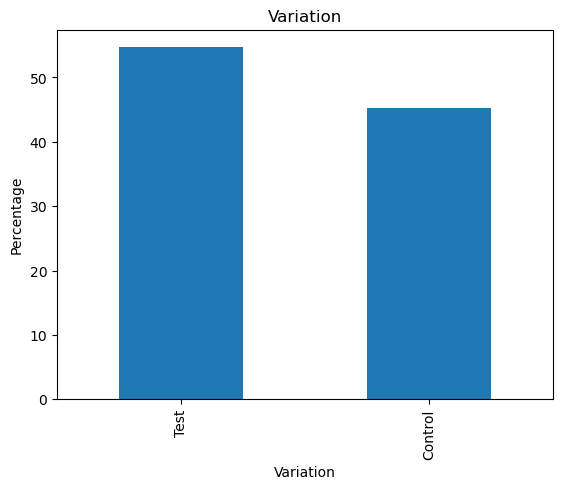

In [15]:
import matplotlib.pyplot as plt

value_counts = cleaned_df['Variation'].value_counts(normalize=True) * 100


value_counts.plot(kind='bar')

plt.xlabel('Variation')
plt.ylabel('Percentage')
plt.title('Variation')
plt.show()
